Imports

In [1]:
from parameters_U233 import *
import numpy as np
import matplotlib.pyplot as plt
from jitcdde import t
from msrDynamics import Node, System
import pandas as pd
import math
import matplotlib.patches as mpatches

In [3]:
P = 8

# unpack ORNL data
df_ORNL_mag = pd.read_csv(f"./data/ORNL_msre_{int(P)}MW_U233_magnitude.csv",names=['f','mag'])
df_ORNL_mag = df_ORNL_mag.sort_values(df_ORNL_mag.columns[0])
df_ORNL_phase = pd.read_csv(f"./data/ORNL_msre_{int(P)}MW_U233_phase.csv",names=['f','phase'])
df_ORNL_phase = df_ORNL_phase.sort_values(df_ORNL_phase.columns[0])
df_ORNL_mag_t = pd.read_csv(f"./data/ORNL_msre_{int(P)}MW_U233_magnitude_theoretical.csv",names=['f','mag'])
df_ORNL_mag_t = df_ORNL_mag_t.sort_values(df_ORNL_mag_t.columns[0])
df_ORNL_phase_t = pd.read_csv(f"./data/ORNL_msre_{int(P)}MW_U233_phase_theoretical.csv",names=['f','phase'])
df_ORNL_phase_t = df_ORNL_phase_t.sort_values(df_ORNL_phase_t.columns[0])
df_jit = pd.read_csv(f"./data/frequency_response_results_{P}_MW.csv")

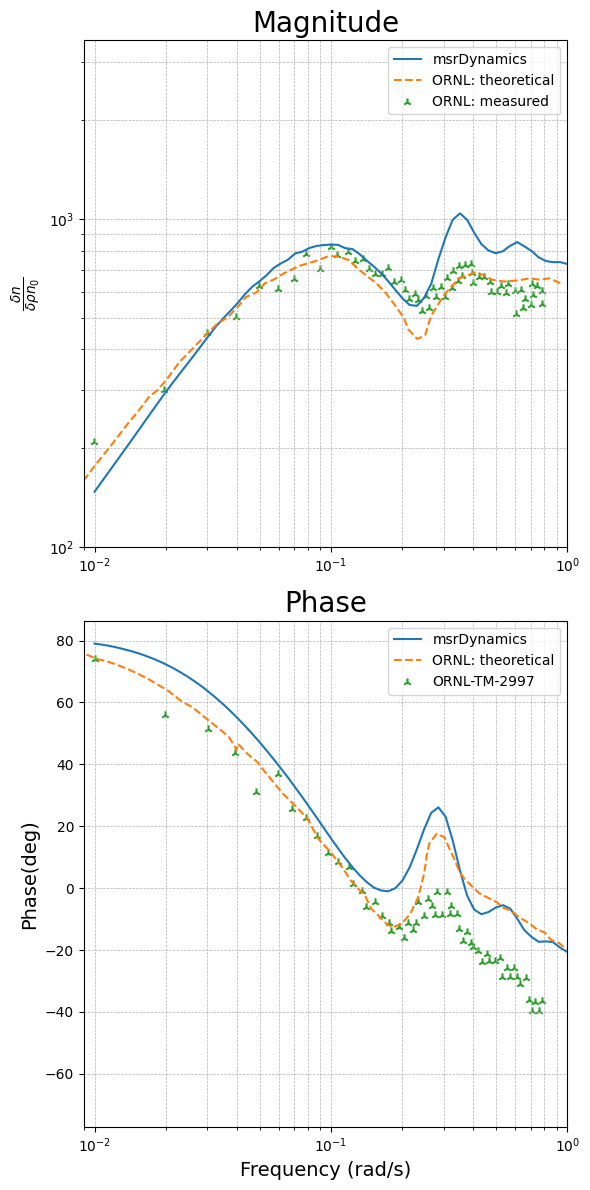

In [4]:
fig,axs = plt.subplots(2,1,figsize=(6,12))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# function to update the style of each axis
def update_axis_style(ax, title, x_label='', y_label='', x_ticks=True):
    ax.set_title(title,fontsize=20)
    ax.set_xlabel(x_label,fontsize=14)
    ax.set_ylabel(y_label,fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)

update_axis_style(axs[0],"Magnitude")
axs[0].plot(df_jit['Frequency'],df_jit['Gain'],label="msrDynamics")
axs[0].plot(df_ORNL_mag_t['f'],df_ORNL_mag_t['mag'],label="ORNL: theoretical",color=colors[1],linestyle="--")
axs[0].scatter(df_ORNL_mag['f'],df_ORNL_mag['mag'],marker="2",color=colors[2],label="ORNL: measured")
axs[0].set_yscale("log")
axs[0].set_xscale("log")
axs[0].set_xlim([9e-3,1e0])
axs[0].set_ylim([1e2,3.5e3])
axs[0].set_ylabel(r"$\frac{\delta n}{\delta \rho n_0}$")
axs[0].legend()

update_axis_style(axs[1],"Phase",x_label='Frequency (rad/s)',y_label="Phase(deg)")
axs[1].plot(df_jit['Frequency'],df_jit['Phase Shift'],label="msrDynamics")
axs[1].plot(df_ORNL_phase_t['f'],df_ORNL_phase_t['phase'],label="ORNL: theoretical",color=colors[1],linestyle="--")
axs[1].scatter(df_ORNL_phase['f'],df_ORNL_phase['phase'],marker="2",color=colors[2],label="ORNL-TM-2997")
axs[1].set_xscale("log")
axs[1].set_xlim([9e-3,1e0])
axs[1].legend()

plt.tight_layout()

In [ ]:
df_adj = pd.read_csv('frequency_response_results_8_MW_double_tau.csv')


fig,axs = plt.subplots(2,1,figsize=(10,10))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# function to update the style of each axis
def update_axis_style(ax, title, x_label='', y_label='', x_ticks=True):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)

update_axis_style(axs[0],r"Magnitude, $\tau = \tau_l + \tau_c$")
axs[0].plot(df_jit['Frequency'],df_jit['Gain'],label=r"$\tau = \tau_l + \tau_c$") 
axs[0].set_yscale("log")
axs[0].set_xscale("log")
axs[0].set_ylabel(r"$\frac{\delta n}{\delta \rho n_0}$")
axs[0].set_xlim([1e-2,2e0])
p = tau_c+tau_l
f_dip = (2*math.pi)/(p)
f_dip2 = (2*math.pi)/((p)/2)
f_peak = (2*math.pi)/(2*(p))
f_peak2 = (2*math.pi)/((2/3)*(p))
axs[0].axvline(x=f_peak,linestyle="--",label=r"$f = 2\pi / (2\tau)$",color=colors[1])
axs[0].axvline(x=f_dip,linestyle="--",label=r"$f = 2\pi / \tau$",color=colors[2])
axs[0].axvline(x=f_peak2,linestyle="--",label=r"$f = 2\pi / (2\tau/3)$",color=colors[4])
axs[0].axvline(x=f_dip2,linestyle="--",label=r"$f = 2\pi / (\tau/2)$",color=colors[3])
axs[0].legend()

update_axis_style(axs[1],r"Magnitude, $\tau = 2\tau_l + 2\tau_c$")
axs[1].plot(df_adj['Frequency'],df_adj['Gain'],label=r"$\tau = 2(\tau_l + \tau_c)$") 
axs[1].set_yscale("log")
axs[1].set_xscale("log")
axs[1].set_ylabel(r"$\frac{\delta n}{\delta \rho n_0}$")
axs[1].set_xlim([1e-2,2e0])
p2 = 2*(tau_c+tau_l)
f_dip = (2*math.pi)/(p2)
f_dip2 = (2*math.pi)/((p2)/2)
f_peak = (2*math.pi)/(2*(p2))
f_peak2 = (2*math.pi)/((2/3)*(p2))
axs[1].axvline(x=f_peak,linestyle="--",label=r"$f = 2\pi / (2\tau)$",color=colors[1])
axs[1].axvline(x=f_dip,linestyle="--",label=r"$f = 2\pi / \tau$",color=colors[2])
axs[1].axvline(x=f_peak2,linestyle="--",label=r"$f = 2\pi / (2\tau/3)$",color=colors[4])
axs[1].axvline(x=f_dip2,linestyle="--",label=r"$f = 2\pi / (\tau/2)$",color=colors[3])
axs[1].legend()

plt.tight_layout()



In [ ]:
df_adj = pd.read_csv('frequency_response_results_8_MW_double_tau.csv')


fig,axs = plt.subplots(2,1,figsize=(10,10))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# function to update the style of each axis
def update_axis_style(ax, title, x_label='', y_label='', x_ticks=True):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True)

# Filling between ranges where inc_dec is True
inc_dec = np.ones(len(df_jit))
for f in enumerate(df_jit['Frequency']):
    delay_input = np.cos(f[1]*((-p))) # t = 2pi-tau
    if (delay_input > 0):
        inc_dec[f[0]] = 0

# Find start and end points of True and False segments in inc_dec and fill between them
start_true = None
start_false = None
for i in range(len(df_jit['Frequency'])):
    if inc_dec[i]:
        if start_false is not None:
            # Fill the False segment before starting the True segment
            axs[0].fill_between(df_jit['Frequency'][start_false:i], 0, df_jit['Gain'][start_false:i], alpha=0.23, color='red',interpolate=True)
            start_false = None
        if start_true is None:
            start_true = i  # Mark the start of a True segment
    else:
        if start_true is not None:
            # Fill the True segment before starting the False segment
            axs[0].fill_between(df_jit['Frequency'][start_true:i], 0, df_jit['Gain'][start_true:i], alpha=0.23, color='green',interpolate=True)
            start_true = None
        if start_false is None:
            start_false = i  # Mark the start of a False segment

# Check if there is a segment that goes until the end
if start_true is not None:
    axs[0].fill_between(df_jit['Frequency'][start_true:], 0, df_jit['Gain'][start_true:], alpha=0.3, color='green',interpolate=True)
if start_false is not None:
    axs[0].fill_between(df_jit['Frequency'][start_false:], 0, df_jit['Gain'][start_false:], alpha=0.3, color='red',interpolate=True)

update_axis_style(axs[0],r"Magnitude, $\tau = \tau_l + \tau_c$")
axs[0].plot(df_jit['Frequency'],df_jit['Gain'],label=r"$\tau = \tau_l + \tau_c$") 
axs[0].set_yscale("log")
axs[0].set_xscale("log")
axs[0].set_ylabel(r"$\frac{\delta n}{\delta \rho n_0}$")
axs[0].set_xlim([1e-2,2e0])

red_patch = mpatches.Patch(color='red', alpha=0.3, label=r"$\frac{d\rho_{in}}{dt}(t-2 \pi /f) \cdot \frac{d\rho_{in}}{dt}(t) > 0$")
green_patch = mpatches.Patch(color='green', alpha=0.3, label=r"$\frac{d\rho_{in}}{dt}(t-2 \pi /f) \cdot \frac{d\rho_{in}}{dt}(t) < 0$")

axs[0].legend(handles=[axs[0].get_lines()[0], red_patch, green_patch])

######################################################################################
# Double tau
######################################################################################

update_axis_style(axs[1],r"Magnitude, $\tau = 2\tau_l + 2\tau_c$")
axs[1].plot(df_adj['Frequency'],df_adj['Gain'],label=r"$\tau = 2(\tau_l + \tau_c)$") 
axs[1].set_yscale("log")
axs[1].set_xscale("log")
axs[1].set_ylabel(r"$\frac{\delta n}{\delta \rho n_0}$")
axs[1].set_xlim([1e-2,2e0])
axs[1].legend(handles=[axs[1].get_lines()[0], red_patch, green_patch])

# Filling between ranges where inc_dec is True
inc_dec = np.ones(len(df_adj))
for f in enumerate(df_adj['Frequency']):
    delay_input = np.cos(f[1]*(-p2)) # t = 2pi-tau
    if (delay_input > 0):
        inc_dec[f[0]] = 0

# Find start and end points of True and False segments in inc_dec and fill between them
start_true = None
start_false = None
for i in range(len(df_adj['Frequency'])):
    if inc_dec[i]:
        if start_false is not None:
            # Fill the False segment before starting the True segment
            axs[1].fill_between(df_adj['Frequency'][start_false:i], 0, df_adj['Gain'][start_false:i], alpha=0.23, color='red',interpolate=True)
            start_false = None
        if start_true is None:
            start_true = i  # Mark the start of a True segment
    else:
        if start_true is not None:
            # Fill the True segment before starting the False segment
            axs[1].fill_between(df_adj['Frequency'][start_true:i], 0, df_adj['Gain'][start_true:i], alpha=0.23, color='green',interpolate=True)
            start_true = None
        if start_false is None:
            start_false = i  # Mark the start of a False segment

# Check if there is a segment that goes until the end
if start_true is not None:
    axs[1].fill_between(df_adj['Frequency'][start_true:], 0, df_adj['Gain'][start_true:], alpha=0.3, color='green',interpolate=True)
if start_false is not None:
    axs[1].fill_between(df_adj['Frequency'][start_false:], 0, df_adj['Gain'][start_false:], alpha=0.3, color='red',interpolate=True)



plt.tight_layout()

